#### 1.

https://www.kaggle.com/olgamazur

#### 2.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('https://github.com/Serfentum/bf_course/raw/master/14.pandas/train.csv')

In [20]:
df.head()

,pos,reads_all,matches,mismatches,deletions,insertions,A,C,T,G,A_fraction,T_fraction,G_fraction,C_fraction
0,279,8045,32,7972,46,8,7911.0,54.0,11.0,NaN,0.983503,0.000815,NaN,0.006896
1,280,8045,7995,48,19,9,NaN,16.0,13.0,19.0,NaN,0.001355,0.002392,0.001914
2,281,8045,7983,50,16,5,NaN,24.0,4.0,24.0,NaN,0.000639,0.002875,0.002310
3,282,8049,7510,505,33,65,105.0,11.0,395.0,NaN,0.012750,0.049096,NaN,0.000919
4,283,8042,7786,155,115,62,46.0,NaN,93.0,31.0,0.004960,0.010992,0.003186,NaN


In [35]:
def return_histo(position):
    
    """
    The function receives information about a position in dataframe.
    
    position: position number in dataframe
    
    The function return a histogram of distributions of nucleotides.
    
    """
    df_histo = df.loc[df.pos == position]
    data = [float(df_histo['A']), float(df_histo['C']), float(df_histo['T']), float(df_histo['G'])]
    ax = plt.gca()
    ax.bar(['A','C','T','G'], data)
    plt.show()

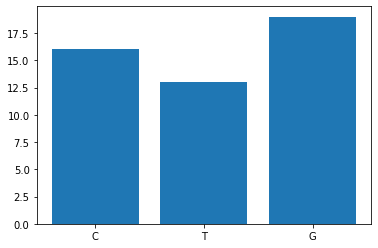

In [36]:
return_histo(280)

#### 3. 

In [41]:
df_match = df.loc[df.matches > df['matches'].mean()]

In [49]:
df_match.head()

,pos,reads_all,matches,mismatches,deletions,insertions,A,C,T,G,A_fraction,T_fraction,G_fraction,C_fraction
1,280,8045,7995,48,19,9,NaN,16.0,13.0,19.0,NaN,0.001355,0.002392,0.001914
2,281,8045,7983,50,16,5,NaN,24.0,4.0,24.0,NaN,0.000639,0.002875,0.002310
3,282,8049,7510,505,33,65,105.0,11.0,395.0,NaN,0.012750,0.049096,NaN,0.000919
4,283,8042,7786,155,115,62,46.0,NaN,93.0,31.0,0.004960,0.010992,0.003186,NaN
5,284,8048,7094,104,864,241,24.0,57.0,26.0,NaN,0.002687,0.002429,NaN,0.006792


In [59]:
df_to_save = df_match[['pos', 'reads_all', 'mismatches', 'deletions' , 'insertions']]

In [60]:
df_to_save.head()

,pos,reads_all,mismatches,deletions,insertions
1,280,8045,48,19,9
2,281,8045,50,16,5
3,282,8049,505,33,65
4,283,8042,155,115,62
5,284,8048,104,864,241


In [61]:
df_to_save.to_csv(r'train_part.csv')

#### 4.

In [68]:
import seaborn as sns

In [63]:
data = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
submission = pd.read_csv('gender_submission.csv') 

In [72]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [74]:
submission.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


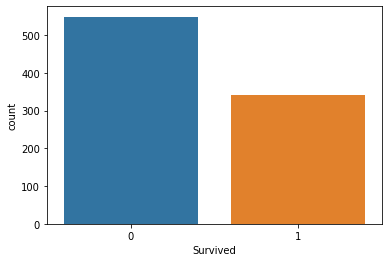

In [69]:
sns.countplot(data['Survived'])

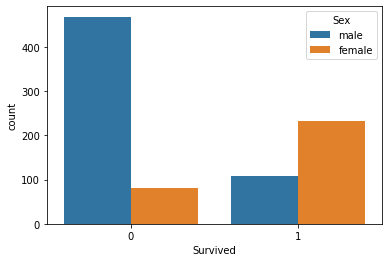

In [70]:
sns.countplot(data['Survived'],hue=data['Sex'])

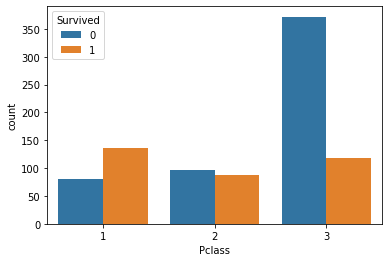

In [71]:
sns.countplot(data['Pclass'],hue=data['Survived'])

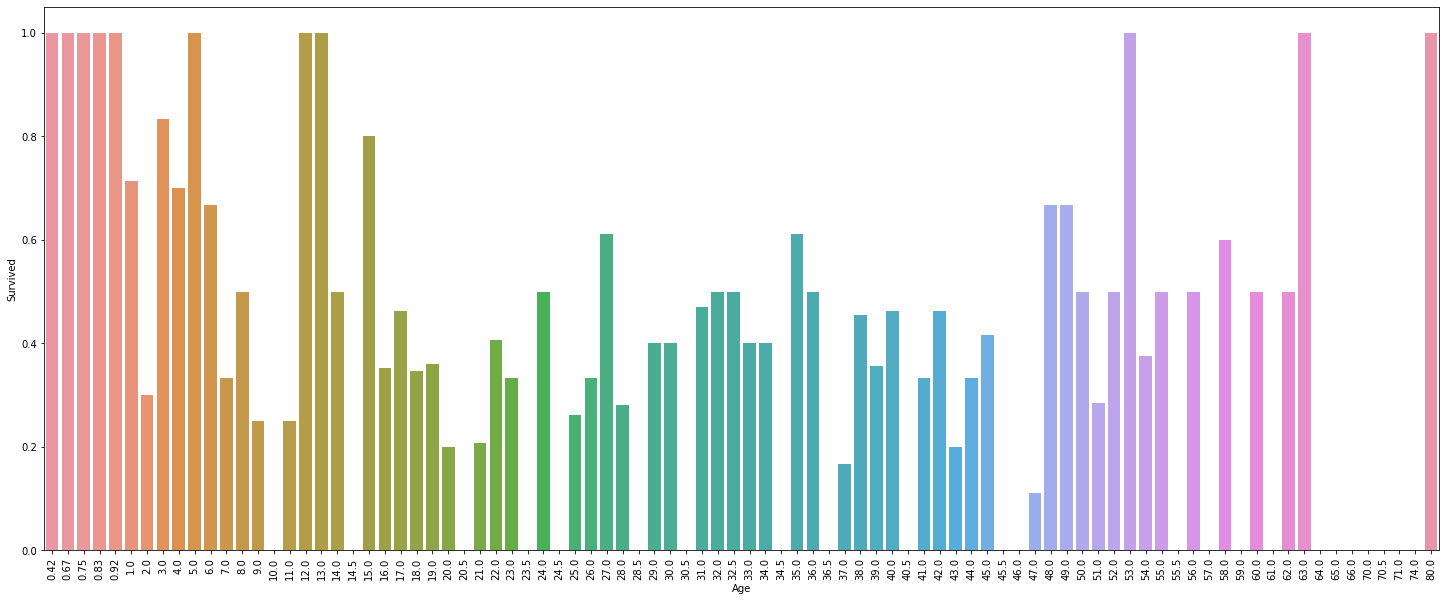

In [78]:
plt.figure(figsize=(25,10))
sns.barplot(data['Age'],data['Survived'], ci=None)
plt.xticks(rotation=90);

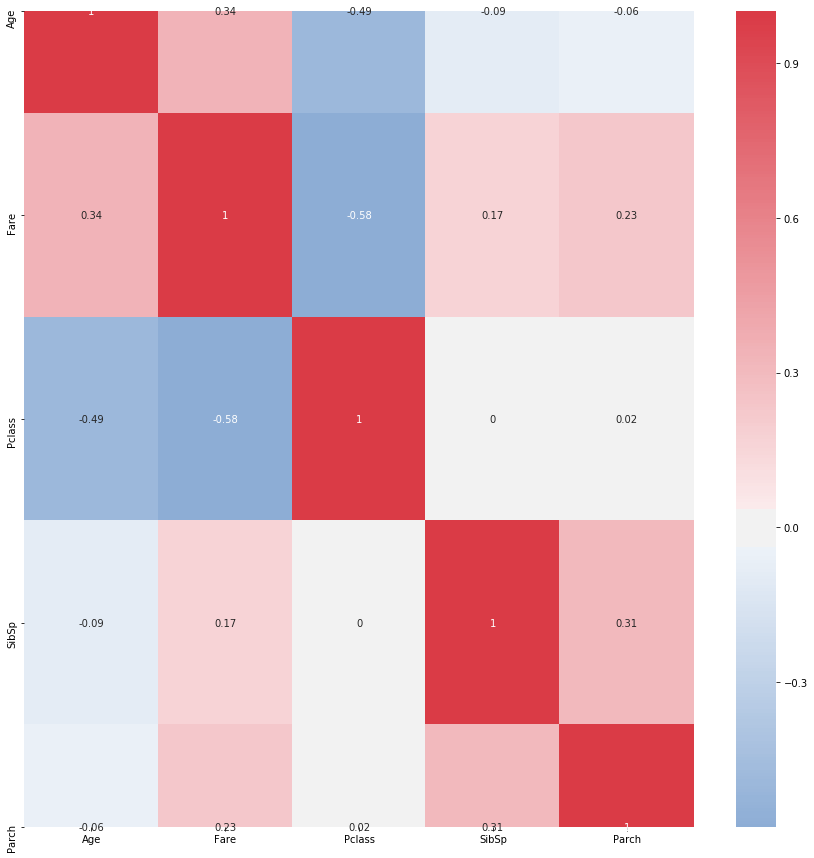

In [96]:
numeric_features = ['Age', 'Fare']
ordinal_features = ['Pclass', 'SibSp', 'Parch']
nominal_features = ['Sex', 'Embarked']

cor_matrix = data_test[numeric_features + ordinal_features].corr().round(2)
fig = plt.figure(figsize=(15,15));
sns.heatmap(cor_matrix, annot=True, center=0, cmap = sns.diverging_palette(250, 10, as_cmap=True), ax=plt.subplot(111));
plt.show()